<a href="https://colab.research.google.com/github/tshivangi22/my-first-pr/blob/main/221018_Shivangi_Tekriwal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# finding pair of stationary and non stationary stocks
import pandas as pd
import yfinance as yf
from statsmodels.tsa.stattools import adfuller

stock1_symbol = "MSFT"
stock2_symbol = "AAPL"
stock3_symbol = "GOOG"
stock4_symbol = "META"

start_date = "2023-01-01"
end_date = "2023-05-25"

stock1_data = yf.download(stock1_symbol, start=start_date, end=end_date)
stock2_data = yf.download(stock2_symbol, start=start_date, end=end_date)
stock3_data = yf.download(stock3_symbol, start=start_date, end=end_date)
stock4_data = yf.download(stock4_symbol, start=start_date, end=end_date)

closing_prices = pd.DataFrame()
closing_prices['Close_1'] = stock1_data['Close']
closing_prices['Close_2'] = stock2_data['Close']
closing_prices['Close_3'] = stock3_data['Close']
closing_prices['Close_4'] = stock4_data['Close']

ratio1 = closing_prices['Close_1'] / closing_prices['Close_2']
ratio2 = closing_prices['Close_3'] / closing_prices['Close_4']

def check_stationarity(ratio):
    result = adfuller(ratio)
    p_value = result[1]
    if p_value < 0.05:
        return True                          
    else:
        return False       

if(check_stationarity(ratio1)):
   print(f"{stock1_symbol} and {stock2_symbol} are stationary")
if(not(check_stationarity(ratio2))):
   print(f"{stock3_symbol} and {stock4_symbol} are not stationary")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
MSFT and AAPL are stationary
GOOG and META are not stationary


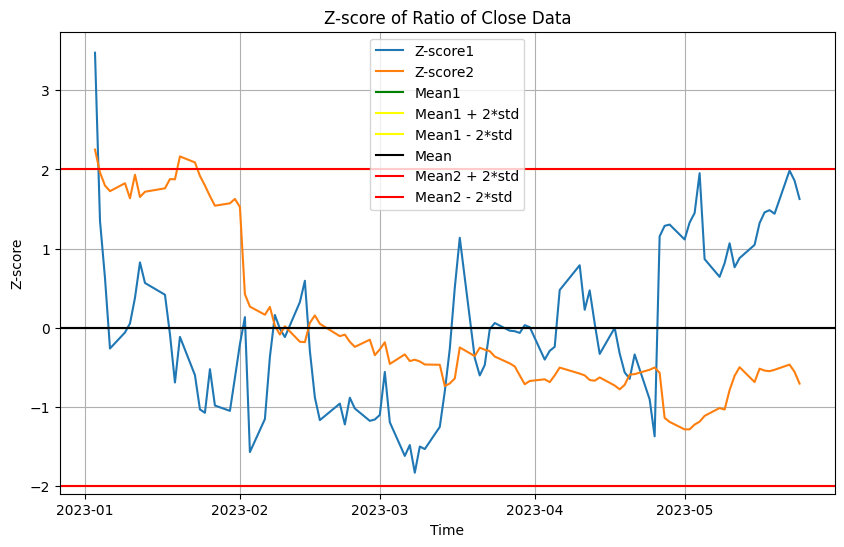

In [7]:
import matplotlib.pyplot as plt
z_score1 = (ratio1 - ratio1.mean()) / ratio1.std()
z_score2 = (ratio2 - ratio2.mean()) / ratio2.std()
plt.figure(figsize=(10, 6))
plt.plot(z_score1, label='Z-score1')
plt.plot(z_score2, label='Z-score2')

plt.axhline(z_score1.mean(), color='green', label='Mean1')
plt.axhline(z_score1.mean() + 2 * z_score1.std(), color='yellow', label='Mean1 + 2*std')
plt.axhline(z_score1.mean() - 2 * z_score1.std(), color='yellow', label='Mean1 - 2*std')
plt.axhline(z_score2.mean(), color='black', label='Mean')
plt.axhline(z_score2.mean() + 2 * z_score2.std(), color='red',label='Mean2 + 2*std')
plt.axhline(z_score2.mean() - 2 * z_score2.std(), color='red', label='Mean2 - 2*std')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Z-score')
plt.title('Z-score of Ratio of Close Data')
plt.grid(True)
plt.show()


In [8]:
newstock1_data = yf.download(stock1_symbol, start='2022-05-25', end='2023-05-25')
newstock1_data["Daily_Return"] = newstock1_data["Close"].pct_change()
sharpe_ratio = (newstock1_data["Daily_Return"].mean()-0.03 )/ newstock1_data["Daily_Return"].std() * (252 ** 0.5)
print("Sharpe Ratio:", sharpe_ratio)

[*********************100%***********************]  1 of 1 completed
Sharpe Ratio: -22.192535843150882


In [9]:
start_date = "2021-05-25"  
end_date = "2023-05-25"  
stock_dataMA = yf.download(stock1_symbol, start=start_date, end=end_date)
stock_dataMA["15day_MA"] = stock_dataMA["Close"].rolling(window=15).mean()
stock_dataMA["50day_MA"] = stock_dataMA["Close"].rolling(window=50).mean()
golden_cross_dates = stock_dataMA[(stock_dataMA["15day_MA"] > stock_dataMA["50day_MA"])&
                                                                        (stock_dataMA["15day_MA"].shift() < stock_dataMA["50day_MA"].shift())].index
death_cross_dates = stock_dataMA[(stock_dataMA["15day_MA"] < stock_dataMA["50day_MA"])&
                                                                        (stock_dataMA["15day_MA"].shift() > stock_dataMA["50day_MA"].shift())].index
print("Golden Cross Dates:",golden_cross_dates)
print("Death Cross Dates:",death_cross_dates)

[*********************100%***********************]  1 of 1 completed
Golden Cross Dates: DatetimeIndex(['2021-10-21', '2022-03-30', '2022-07-22', '2022-07-29',
               '2022-11-25', '2023-02-02'],
              dtype='datetime64[ns]', name='Date', freq=None)
Death Cross Dates: DatetimeIndex(['2021-10-04', '2022-01-05', '2022-04-21', '2022-07-26',
               '2022-09-08', '2023-01-05'],
              dtype='datetime64[ns]', name='Date', freq=None)
